<a href="https://colab.research.google.com/github/SLVmain/Deep_Learning_practice/blob/main/HW__15_heroku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо подготовить нейронную сеть для распознавания MNIST, загрузить на Heroku и запустить веб сервис:

* Подготовить модель для распознавания MNIST
* Подключить Git
* Подключить Heroku
* Загрузить модуль на Heroku и проверить работу веб-сервиса

In [ ]:
# Загружаем базу mnist
from tensorflow.keras.datasets import mnist 

# Сеть прямого распространения
from tensorflow.keras.models import Sequential 

# Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta 

# Используем для to_categorical
from tensorflow.keras import utils 

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image 

# Для загрузки своей картинки
from google.colab import files 

# Библиотека работы с массивами
import numpy as np 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для отрисовки изображений
from PIL import Image 

# Для генерации случайных чисел 
import random 

# Для округления
import math 

#Для работы с файлами 
import os 

# подключем диск
from google.colab import drive

%matplotlib inline

## Распознавание изображений из набора данных MNIST 


**Подготовка данных**


In [ ]:
# Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

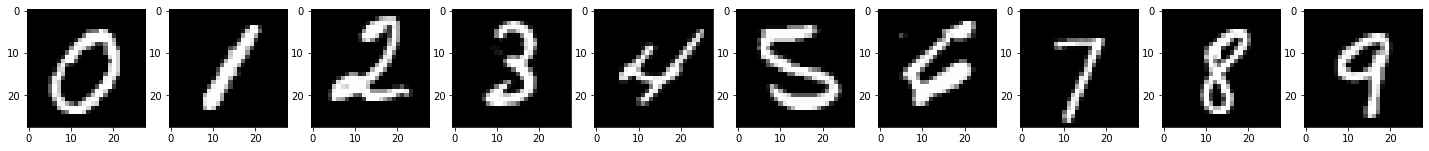

In [ ]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # Создаем полотно из 10 графиков

for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков

plt.show() # Показываем изображения

In [ ]:
# Превращаем y_train и y_test сетей в формат one hot encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# Меняем формат данных MNIST
# Надо добавить в конце размерность 1
# Чтобы свёрточная сеть понимала, что это чёрно-белые данные

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Посмотрим форматы выборок перед обучением

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Нейронная сеть**

In [ ]:
batch_size = 128 

# Создаем последовательную модель

model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1))) # Слой пакетной нормализации
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Второй сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2))) # Первый слой подвыборки

model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Flatten())

model.add(Dense(256, activation='relu')) # Полносвязный слой для классификации
model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Dense(10, activation='softmax')) # Выходной полносвязный слой

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

Epoch 1/15
469/469 [==============================] - 5s 6ms/step - loss: 0.1629 - accuracy: 0.9499 - val_loss: 0.0536 - val_accuracy: 0.9838
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.0373 - val_accuracy: 0.9861
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0290 - val_accuracy: 0.9900
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0293 - val_accuracy: 0.9895
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0304 - val_accuracy: 0.9897
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 0.0313 - val_accuracy: 0.9901
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0167 - accuracy: 0.9943 - val_loss: 0.0327 - val_accuracy: 0.9907
Epoch 

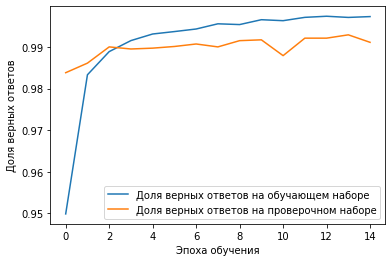

In [ ]:
# Обучаем сеть на данных mnist

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отображаем график точности обучения

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
# Пересохранение обученной модели полностью (веса и архитектура)
model.save('model_fmr_all.h5')

Создадим программный файл с кодом для:
* инициализации модели;
* загрузки весов;
* работы модели в режиме распознавания;
* пред- и постобработки изображений.

проверим работу функции

In [ ]:
from tensorflow.keras.models import load_model
MODEL_NAME =   'model_fmr_all.h5'
import numpy as np
from PIL import Image 
model = load_model(MODEL_NAME) # Загружаем веса
INPUT_SHAPE = (28, 28, 1) #размер входной картинки


def process(image_file):
    image = Image.open(image_file).convert('L') # Открываем обрабатываемый файл, переводим с серую шкалу с одним каналом
    resized_img = image.resize((INPUT_SHAPE[1], INPUT_SHAPE[0])) # Изменяем размер изображения в соответствии со входом сети
    array = np.array(resized_img, dtype='float64')  # в нумпай
    array = array.reshape(-1, 28, 28, 1) #нужная размерность
    
    #в модель
    class_out = np.argmax(model.predict(array))

    return class_out

In [ ]:
ttt = '/content/777.jpg'

In [ ]:
out = process(ttt)
print(out)

7


In [ ]:
!rm -rf 777.jpg

In [ ]:
'''from google.colab import drive
drive.flush_and_unmount()'''

работает, напишем файл для heroku

In [ ]:
#пред и пост обработка файла
segment_file = '''

from tensorflow.keras.models import load_model
MODEL_NAME =   'model_fmr_all.h5'
import numpy as np
from PIL import Image 
model = load_model(MODEL_NAME) # Загружаем веса
INPUT_SHAPE = (28, 28, 1) #размер входной картинки


def process(image_file):
    image = Image.open(image_file).convert('L') # Открываем обрабатываемый файл, переводим с серую шкалу с одним каналом
    resized_img = image.resize((INPUT_SHAPE[1], INPUT_SHAPE[0])) # Изменяем размер изображения в соответствии со входом сети
    array = np.array(resized_img)  # в нумпай, первый слой у нас батчнорм, так что не нужна нормализация
    array = array.reshape(-1, 28, 28, 1) #нужная размерность
    
    #в модель
    class_out = np.argmax(model.predict(array))

    return class_out
'''

with open('segment.py', 'w') as file:
  file.write(segment_file)

Приступим к созданию демонстрационной формы для выбранной модели. Все создаваемые файлы вместе составят установочный набор, на который будет ориентироваться хостинг при развертывании вашего сервиса.

Создадим файл приложения (формы):

In [ ]:
app_file = '''

import streamlit as st
from PIL import Image 
from segment import process

st.title('Распознавание цифр MNIST')

image_file = st.file_uploader('Load an image', type=['png']) 

if not image_file is None: 
    image = Image.open(image_file)
    results = process(image_file)
    st.write('Output digit:', results)
'''

with open('app.py', 'w') as file:
  file.write(app_file)

Создание файла для задания конфигурации Streamlit:

In [ ]:
setup_file = '''

mkdir -p ~/.streamlit/
echo "\
[server]\n\
headless = true\n\
port = $PORT\n\
enableCORS = false\n\
\n\
" > ~/.streamlit/config.toml

'''

with open('setup.sh', 'w') as file:
    file.write(setup_file)

Создание файла для запуска сервиса:

In [ ]:
proc_file = 'web: sh setup.sh && streamlit run app.py'

with open('Procfile', 'w') as file:
    file.write(proc_file)

Создание requirements:

In [ ]:
requirements_file = '''
streamlit==1.8.0
tensorflow-cpu==2.8.0
click<=8.0.4
'''

with open('requirements.txt', 'w') as file:
    file.write(requirements_file)

Удаление лишних файлов, находящихся в текущей директории в Colab по умолчанию:

In [ ]:
!rm -rf sample_data

Шаг с установкой Git можно пропустить, так как виртуальные машины Google Colab уже содержат предустановленный пакет Git.<br>Проверка наличия Git:

In [ ]:
!git --version

git version 2.17.1


Задание имени пользователя и e-mail для Git. Укажите свой email и Имя-Фамилию:

In [ ]:
!git config --global user.email "sky.tandem@gmail.com"
!git config --global user.name "Skytandem"

Установка Heroku CLI (Command Line Interface):

In [ ]:
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1232  100  1232    0     0  13391      0 --:--:-- --:--:-- --:--:-- 13391
+ dpkg -s apt-transport-https
+ echo deb https://cli-assets.heroku.com/apt ./
+ dpkg -s heroku-toolbelt
+ true
+ curl https://cli-assets.heroku.com/apt/release.key
+ apt-key add -
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1753  100  1753    0     0  48694      0 --:--:-- --:--:-- --:--:-- 50085
+ apt-get update
+ apt-get install -y heroku


Проверка установки Heroku CLI:

In [ ]:
!heroku --version

heroku/7.60.2 linux-x64 node-v14.19.0


Для авторизации в Heroku необходимо:

1. создать переменную `LOGIN` и поместить в нее ваш логин с Heroku
2. создать переменную `API_KEY` и поместить в нее значение из поля `API Key` (перейти на [страницу с настройками Heroku](https://dashboard.heroku.com/account), прокрутить вниз).
3. создать файл `.netrc` в домашней директории с указанием логина и скопированного токена:

In [ ]:
LOGIN = 'sky.tandem@gmail.com' # Укажите свой логин
API_KEY = '47a09d99-d5e9-497d-8200-cc1597583e62' # Укажите свой API-key
           
auth_file = '''machine api.heroku.com
  login {login}
  password {password}
machine git.heroku.com
  login {login}
  password {password}
'''.format(login=LOGIN, password=API_KEY)

with open('/root/.netrc', 'w') as file:
    file.write(auth_file)

Прежде чем Вы сможете развернуть свое приложение в Heroku, Вам необходимо инициализировать локальный репозиторий Git и зафиксировать в нем код вашего приложения:

In [ ]:
!git init
!git add .
!git commit -m "My ft commit"

Reinitialized existing Git repository in /content/.git/
[master ca985b9] My ft commit
 1 file changed, 0 insertions(+), 0 deletions(-)


In [ ]:
"""!git add .
!git commit -m "My first commit""""

[master 710483a] My first commit
 1 file changed, 1 insertion(+), 1 deletion(-)


Код вашего приложения теперь отслеживается в локальном репозитории Git. Он еще не отправлен на удаленный сервер.

Команда `heroku create` создает новое пустое приложение на Heroku вместе с соответствующим репозиторием Git. Если Вы запустите эту команду из корневого каталога Вашего приложения, пустой репозиторий Heroku Git автоматически станет удаленным для Вашего локального репозитория.

In [ ]:
!heroku create

Creating app... ⣾ 
⣽⣻⢿⡿⣟⣯⣷Creating app... done, ⬢ afternoon-reaches-50801
https://afternoon-reaches-50801.herokuapp.com/ | https://git.heroku.com/afternoon-reaches-50801.git


Вы можете использовать команду `git remote`, чтобы проверить, что для Вашего приложения установлен удаленный репозиторий с именем heroku:

In [ ]:
!git remote -v

heroku	https://git.heroku.com/fast-reef-61027.git (fetch)
heroku	https://git.heroku.com/fast-reef-61027.git (push)


Чтобы развернуть приложение в Heroku, нужно использовать команду `git push`, чтобы отправить код из главной или основной ветки локального репозитория на удаленный сервер heroku:

In [ ]:
!git push heroku master

Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 16.44 MiB | 6.12 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Compressing source files... done.
remote: Building source:
remote: 
remote: -----> Building on the Heroku-20 stack
remote: -----> Using buildpack: heroku/python
remote: -----> Python app detected
remote: -----> No Python version was specified. Using the same version as the last build: python-3.10.5
remote:        To use a different version, see: https://devcenter.heroku.com/articles/python-runtimes
remote: -----> No change in requirements detected, installing from cache
remote: -----> Using cached install of python-3.10.5
remote: -----> Installing pip 22.1.2, setuptools 60.10.0 and wheel 0.37.1
remote: -----> Installing SQLite3
remote: -----> Installing requirements with pip
remote: -----> Discovering process types
remote:        Procfile declares types -> web
remote: 
remote: 

In [ ]:
"""!git config --list"""

In [ ]:
!heroku logs --tail

результат ниже, все отработало отлично

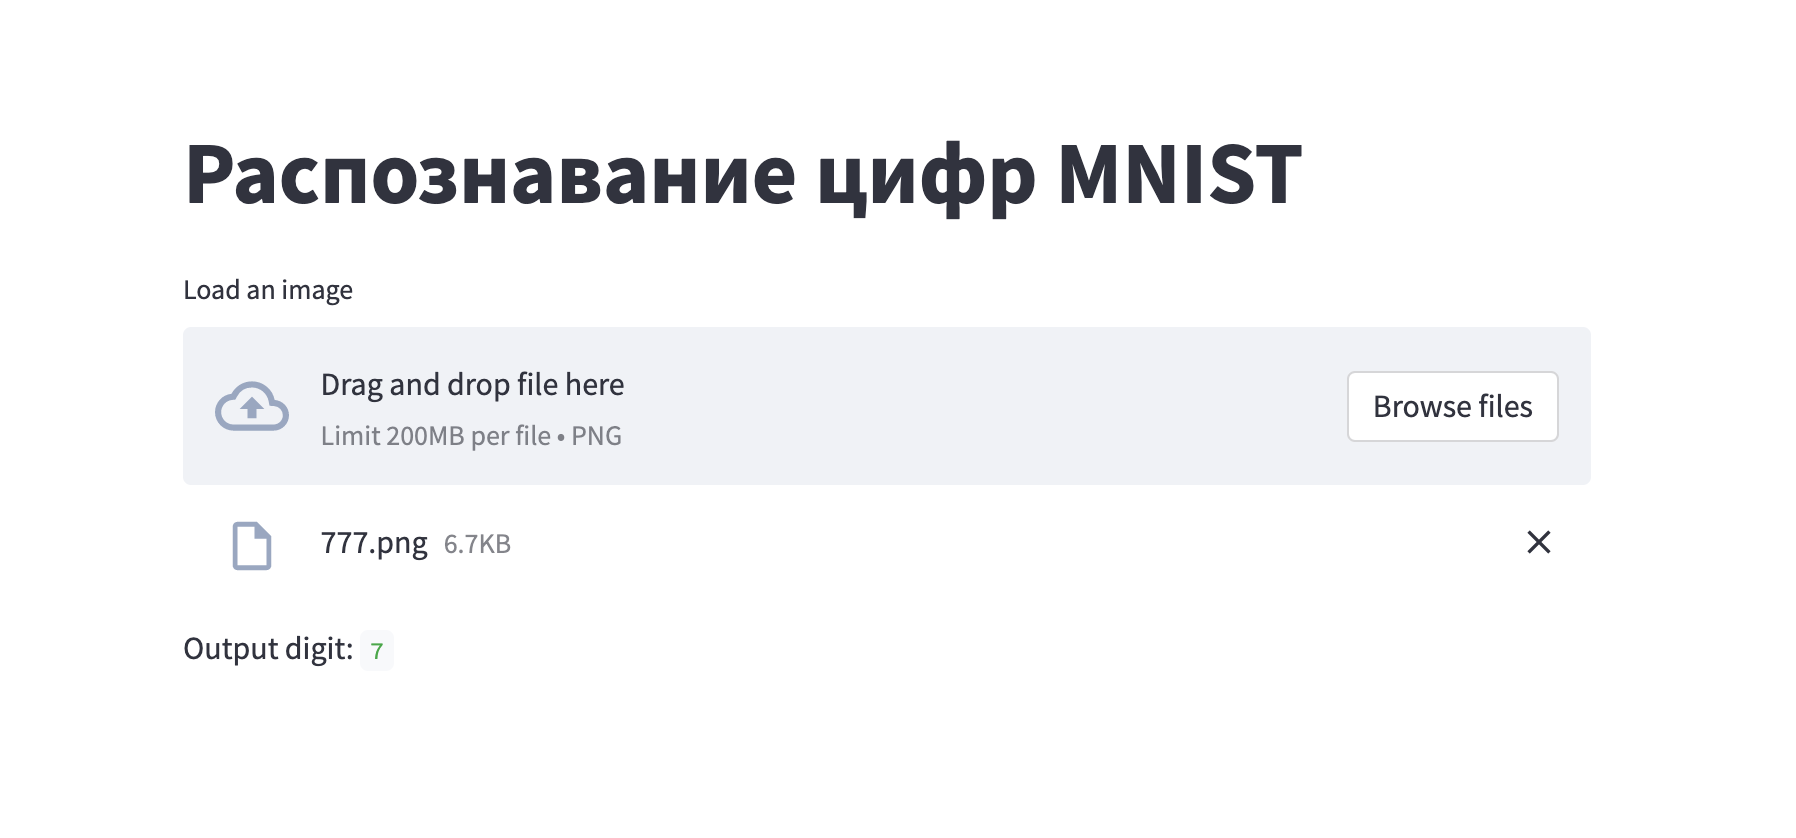

In [ ]:
from IPython.display import Image
Image('/content/res1.png')